In [1]:
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
from labeling_tool import Trie, TrieNode, search_in_trie

['postman', 'sql', 'cypress', 'solid', 'software development', 'swagger', 'kibana', 'nosql']
>5 years working on qa
working knowledge of:
sql & nosql databases
postman, insomnia and/or swagger
kibana
sentry
background in development
comfortable presenting to large internal groups and leadership team members
experience developing integration tests with cypress or similar
analytical skills
team player
have a solid understanding of the entire software development life cycle
have the ability to learn quickly and manage yourself independently
fluency in english
don't fulfill all the criteria? don't worry - they're just meant as a rough description of what we're looking for


In [2]:
df = pd.read_csv('./transform_datn/extracted_ITjobs.csv')

In [3]:
df['job_detail_job_requirements'] = df['job_detail_job_requirements'].apply(ast.literal_eval)
df['company_position'] = df['company_position'].apply(ast.literal_eval)
df['job_detail_job_requirements_line'] = df['job_detail_job_requirements_line'].apply(ast.literal_eval)
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(ast.literal_eval)
df['job_detail_job_level'] = df['job_detail_job_level'].apply(ast.literal_eval)

In [4]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",[• Above 8 years of experience in software dev...,[senior]
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...","[Up to 4 years experience in QA / Testing, pre...",[]
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",[A few years of software development experienc...,[]
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",[At least 3-5 years experience in Design & imp...,[senior]
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",[>5 years working on QA],[senior]


In [5]:
# tmp_df = df.loc[(df['job_detail_full_time'] == False) & (df['job_detail_remote'] == False) & (df['job_detail_hybrid'] == False)]
# tmp_df.info()

In [6]:
df.loc[(df['job_detail_remote'] == True)].head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level


In [7]:
df.iloc[875]['url']

'https://www.itjobs.com.vn/vi/job/80573/java-developer'

In [8]:
df.iloc[875]

url                                 https://www.itjobs.com.vn/vi/job/80573/java-de...
source                                                                         ITjobs
crawl_date                                                        2024-04-17 21:23:23
company_name                                                  Hybrid Technologies HCM
company_position                               [90 Nguyen Dinh Chieu, TP Hồ Chí Minh]
company_size                                                                  500-999
job_detail_name                                                        Java Developer
job_detail_salary                                                    Lên đến 35000000
job_detail_full_time                                                            False
job_detail_remote                                                               False
job_detail_job_requirements         [Java , OOP , JavaEE , Oracle , Spring , Hiber...
job_detail_job_requirements_line    [Bạn cần có:, Tốt 

In [9]:
print(df[df['job_detail_job_level'].apply(lambda x: 'intern' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'fresher' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'junior' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'senior' in x)].count())

url                                 8
source                              8
crawl_date                          8
company_name                        8
company_position                    8
company_size                        8
job_detail_name                     8
job_detail_salary                   8
job_detail_full_time                8
job_detail_remote                   8
job_detail_job_requirements         8
job_detail_job_requirements_line    8
job_detail_year_of_exp              8
job_detail_job_level                8
dtype: int64
url                                 38
source                              38
crawl_date                          38
company_name                        38
company_position                    38
company_size                        38
job_detail_name                     38
job_detail_salary                   38
job_detail_full_time                38
job_detail_remote                   38
job_detail_job_requirements         38
job_detail_job_requirement

# Step 2

In [10]:
time_unit = [
    'years',
    'year',
    'months',
    'month',
    'năm',
    'tháng'
]
pattern = f"(\S+)\s({'|'.join(time_unit)})(?!(?:\s*old|s\sold)\b)"
print(pattern)
def extract_year(year_exp):
    matches = re.findall(pattern, year_exp)
    # print(pattern)
    res = []
    for match in matches:
        res.append(match[0] + ' ' + match[1])
    return res

def get_the_experience(list_string):
    tmp_list_string = [extract_year(string) for string in list_string]
    while len(tmp_list_string) != 0:
        if len(tmp_list_string[0]) == 0:
            tmp_list_string.pop(0)
        else:
            break
    if len(tmp_list_string) == 0:
        return None
    first_line_experience = tmp_list_string[0]
    while len(first_line_experience) != 0:
        if re.search(r'\d+', first_line_experience[0]) is None:
            first_line_experience.pop(0)
        else:
            break
    if len(first_line_experience) == 0:
        return None
    number = int(re.findall(r'\d+', first_line_experience[0])[0])
    if 'tháng' in first_line_experience[0] or \
        'month' in first_line_experience[0] or \
        'months' in first_line_experience[0]:
        number = float(number/12)
    return number


(\S+)\s(years|year|months|month|năm|tháng)(?!(?:\s*old|s\sold)


In [11]:
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(get_the_experience)

In [12]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,[senior]
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,[]
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,[]
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,[senior]
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,[senior]


In [13]:
df.loc[df['job_detail_year_of_exp'].isna()]['url']

2       https://www.itjobs.com.vn/vi/job/81551/java-ap...
5       https://www.itjobs.com.vn/vi/job/81554/ban-cnt...
8       https://www.itjobs.com.vn/vi/job/81557/senior-...
9       https://www.itjobs.com.vn/vi/job/81558/scrum-m...
12      https://www.itjobs.com.vn/vi/job/81547/connect...
                              ...                        
5558    https://www.itjobs.com.vn/vi/job/73606/backend...
5559    https://www.itjobs.com.vn/vi/job/73604/9-php-d...
5560    https://www.itjobs.com.vn/vi/job/73610/devops-...
5561    https://www.itjobs.com.vn/vi/job/73608/busines...
5566    https://www.itjobs.com.vn/vi/job/73597/net-dev...
Name: url, Length: 1827, dtype: object

In [14]:
df['job_detail_year_of_exp'].isnull().sum()

1827

In [15]:
df['job_detail_year_of_exp'].describe()

count    3740.000000
mean        3.132398
std         1.912930
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        44.000000
Name: job_detail_year_of_exp, dtype: float64

In [16]:
df['job_detail_year_of_exp'].idxmax()

3125

In [17]:
df.iloc[3125]['url']

'https://www.itjobs.com.vn/vi/job/77622/chuyen-gia-quan-ly-rui-ro-an-ninh-thong-tin'

## lỗi đánh máy: 044 năm kinh nghiệm -> 4 năm kinh nghiệm

In [18]:
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].map(lambda x: x/10 if x>40 else x)
df['job_detail_year_of_exp'].describe()

count    3740.000000
mean        3.121809
std         1.792465
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: job_detail_year_of_exp, dtype: float64

In [19]:
df['job_detail_year_of_exp'].idxmax()

2536

In [20]:
df.iloc[2536]['url']

'https://www.itjobs.com.vn/vi/job/78488/data-architect'

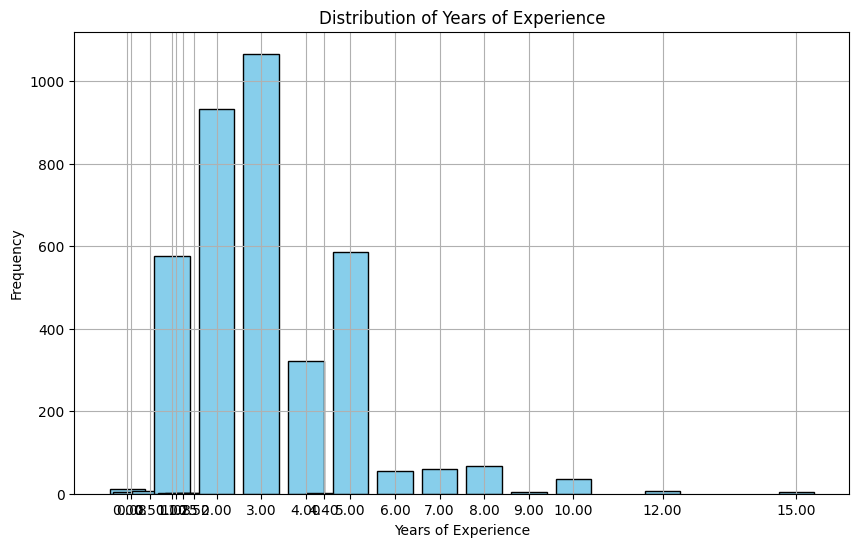

In [21]:
experience_counts = df['job_detail_year_of_exp'].value_counts().sort_index()

years_of_experience = experience_counts.index.tolist()

frequency = experience_counts.values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(years_of_experience, frequency, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.xticks(years_of_experience)
plt.grid(True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x75b4cda2a440>,
 'caps': [<matplotlib.lines.Line2D at 0x75b4cda2a980>,
 'boxes': [<matplotlib.lines.Line2D at 0x75b4cda2a1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x75b4cda2aec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x75b4cda2b160>],
 'means': []}

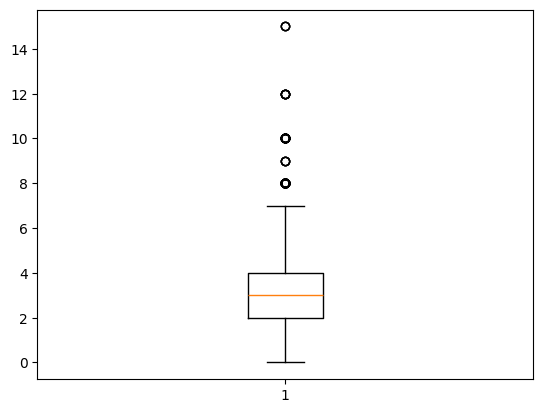

In [22]:
plt.boxplot(df['job_detail_year_of_exp'].dropna())

# Use the highest requirements levels

In [23]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,[senior]
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,[]
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,[]
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,[senior]
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,[senior]


In [24]:
df['job_detail_job_level'] = df['job_detail_job_level'].map(lambda x: None if len(x) == 0 else x[-1])

In [25]:
df.loc[df['job_detail_job_level'] != None].count()

url                                 5567
source                              5567
crawl_date                          5567
company_name                        5567
company_position                    5567
company_size                        5567
job_detail_name                     5567
job_detail_salary                   5567
job_detail_full_time                5567
job_detail_remote                   5567
job_detail_job_requirements         5567
job_detail_job_requirements_line    5567
job_detail_year_of_exp              3740
job_detail_job_level                1472
dtype: int64

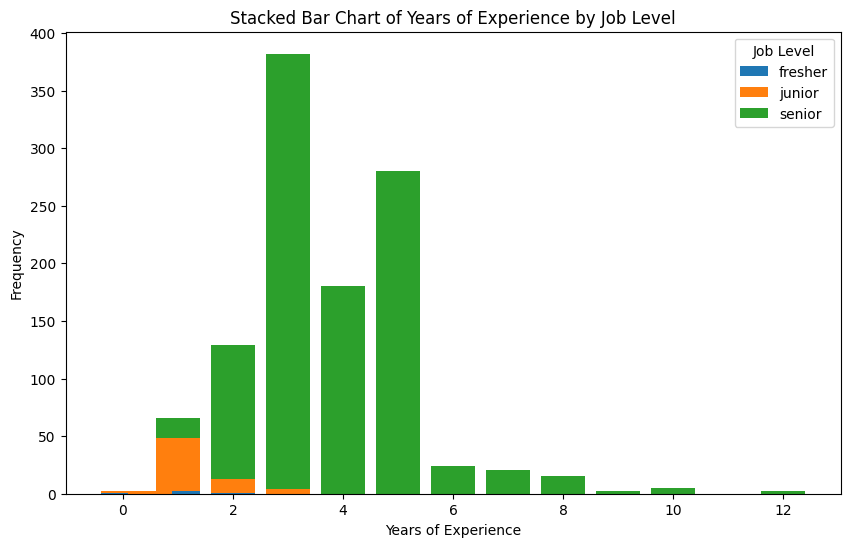

In [26]:
# Order the job levels
job_level_order = ['fresher', 'junior', 'senior']

# Group the DataFrame by 'job_detail_year_of_exp' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_of_exp', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

In [27]:
display(df.head(5))

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,senior
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,None
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,None
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,senior
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,senior


In [28]:
# problem: '.', ',' in salary; 'usd' and 'trieu' is wrong 

metric_dict = {
    'vnd': 1,
    'triệu': 1000000,
    'tr': 1000000,
    'usd': 25000
}

def extract_salary(salary):
    matches = re.findall(r'[-+]?(?:\d*\.*\d+)', salary.replace(',', ''))
    number = -1
    if len(matches) == 0:
        return []
    for metric in metric_dict.keys():
        if metric in salary.lower():
            number = metric_dict[metric]
    if 'usd' in salary.lower():
        matches = [match.replace('.', '') for match in matches]
        if float(matches[0]) > 5000000:
            number = 1
    if float(matches[0]) < 10000:
        number = 25000
        # print(matches)
    return [float(match) * (number if float(match)<5000000 else 1) for match in matches]

df['job_detail_salary_range'] = df['job_detail_salary'].map(extract_salary)
df['job_detail_currency'] = df['job_detail_salary'].map(lambda x: 'usd' if 'usd' in x.lower() else None)
df['new_col'] = df['job_detail_salary_range'].map(lambda x: len(x))
# display(df['job_detail_salary_range'].describe())
display(df.head(5))
display(df.loc[df['new_col'] == 4])

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_salary_range,job_detail_currency,new_col
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,senior,[70000000.0],None,1
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,None,[],None,0
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,None,[],None,0
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,senior,[],None,0
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,senior,[60000000.0],None,1


,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_salary_range,job_detail_currency,new_col


In [29]:
display(df.loc[df['job_detail_salary_range'].apply(lambda x: len(x)) > 2])

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_salary_range,job_detail_currency,new_col


In [30]:
df['job_detail_salary_range_max'] = df['job_detail_salary_range'].apply(lambda x: x[-1] if len(x) != 0 else 0)
df['job_detail_salary_range_min'] = df['job_detail_salary_range'].apply(lambda x: x[0] if len(x) == 2 else 0)

In [31]:
df.head(5)

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_salary_range,job_detail_currency,new_col,job_detail_salary_range_max,job_detail_salary_range_min
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,senior,[70000000.0],None,1,70000000.0,0.0
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,None,[],None,0,0.0,0.0
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,None,[],None,0,0.0,0.0
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,senior,[],None,0,0.0,0.0
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,senior,[60000000.0],None,1,60000000.0,0.0


In [32]:
df.iloc[3939]

url                                 https://www.itjobs.com.vn/vi/job/76151/senior-...
source                                                                         ITjobs
crawl_date                                                        2024-04-18 00:18:03
company_name                                                              Galaxy FinX
company_position                    [PV Gas Tower, 673 Nguyen Huu Tho, TP Hồ Chí M...
company_size                                                                    25-99
job_detail_name                                             Senior/Lead Java Engineer
job_detail_salary                                                        Lên đến 5000
job_detail_full_time                                                            False
job_detail_remote                                                               False
job_detail_job_requirements         [Java , REST API , MS SQL , NoSQL , CI , CD , ...
job_detail_job_requirements_line    [Must-have:, 4+ ye

{'whiskers': [<matplotlib.lines.Line2D at 0x75b4cfdad030>,
 'caps': [<matplotlib.lines.Line2D at 0x75b4cfdaeda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x75b4cfdad690>],
 'medians': [<matplotlib.lines.Line2D at 0x75b4cfdacb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x75b4cfdacf10>],
 'means': []}

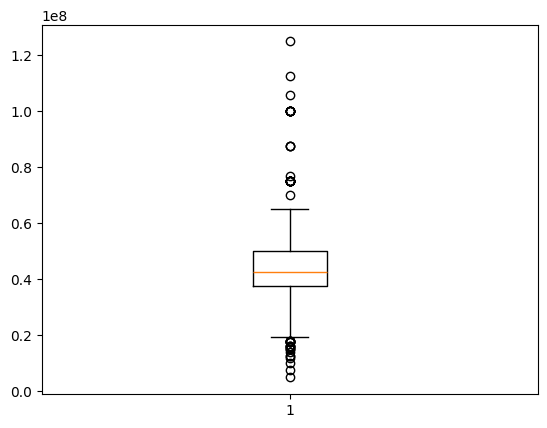

In [33]:
plt.boxplot(
    df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'])]
)

In [34]:
df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'])].idxmax()

3939

In [35]:
df.iloc[3939]['url']

'https://www.itjobs.com.vn/vi/job/76151/senior-lead-java-engineer'

# Big Problem: years of experience isn't extracted correctly (not enough)

# Skill Extract

In [36]:
# build tree
f = open("skill_list.txt", "r")
skill_list = list(f)
trie_directory = '/trie_struture'
skill_list = [x.lower() for x in skill_list]

# for x in df['job_detail_job_requirements']:
#     skill_list.extend(x)

skill_list = list(set(skill_list))

file = open('skill_list.txt','w')
for skill in skill_list:
	file.write(skill.replace('\n', '').rstrip()+"\n")
file.close()

trie = Trie()
for skill in skill_list:
    trie.insert(skill)

In [37]:
def extract_skill(lines):
    res = []
    for line in lines:
        res.extend(search_in_trie(trie, line))
    return res

In [38]:
df['job_detail_extracted_skill'] = df['job_detail_job_requirements_line'].apply(extract_skill)

In [39]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_salary,job_detail_full_time,job_detail_remote,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_salary_range,job_detail_currency,new_col,job_detail_salary_range_max,job_detail_salary_range_min,job_detail_extracted_skill
0,https://www.itjobs.com.vn/vi/job/81250/senior-...,ITjobs,2024-04-17 20:29:36,TOG recruitment,"[An Phu Plaza, 117-119 Ly Chinh Thang, TP Hồ C...",10-24,Senior C# Fullstack Developer,Lên đến 70000000VND,False,False,"[C# , .NET , MS Azure , ASP.NET , ASP.NET MVC ...","[Must have, • Above 8 years of experience in s...",8.0,senior,[70000000.0],None,1,70000000.0,0.0,"[.net, microsoft azure, aws, microsoft azure, ..."
1,https://www.itjobs.com.vn/vi/job/81550/quality...,ITjobs,2024-04-17 20:29:39,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Quality Assurance Engineer,Thỏa Thuận,False,False,"[Tester , QA QC , Web Testing , Jira , MS SQL ...","[Essential:, Up to 4 years experience in QA / ...",4.0,None,[],None,0,0.0,0.0,"[software testing, postman, soap api, api test..."
2,https://www.itjobs.com.vn/vi/job/81551/java-ap...,ITjobs,2024-04-17 20:29:43,TYME,"[HIU Building, 215 Dien Bien Phu, TP Hồ Chí Minh]",100-499,Java API Engineer,Thỏa Thuận,False,False,"[Java , Database Design , Microservices , Spri...","[Requirements:, You will be a perfect match if...",NaN,None,[],None,0,0.0,0.0,"[software development, schema design, spring, ..."
3,https://www.itjobs.com.vn/vi/job/81552/senior-...,ITjobs,2024-04-17 20:29:46,ZAMO,[Adelle MOffice Building 373-375 Nguyen Trong ...,10-24,Senior Java Developer,Thỏa Thuận,False,False,"[Java , Spring , Spring Bean , Core Java , JUn...","[Experience:, Strong OOP, OOD, Design Patterns...",3.0,senior,[],None,0,0.0,0.0,"[ood, oop, design patterns, java core, tdd, un..."
4,https://www.itjobs.com.vn/vi/job/81553/senior-...,ITjobs,2024-04-17 20:29:49,Outpost24,"[Peakview Tower, 36 Hoang Cau, Hà Nội]",10-24,Senior Automation QA Engineer,Lên đến 2400,False,False,"[QA QC , Postman , Swagger , Integration Testi...","[>5 years working on QA, Working knowledge of:...",5.0,senior,[60000000.0],None,1,60000000.0,0.0,"[nosql, sql, swagger, postman, kibana, cypress..."


In [40]:
df.to_csv('./transform_datn/transformed_ITjobs.csv', index=False)